In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

In [2]:
features_num = 3
num = 220

In [3]:
Train_dataset = np.loadtxt('trainset(2)/J0003_0024_0222_20110307012737_cell_7.csv',delimiter=",", skiprows=1)
Test_dataset = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_03.csv',delimiter=",", skiprows=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Train_dataset = scaler.fit_transform(Train_dataset)
Test_dataset = scaler.fit_transform(Test_dataset)
print(Train_dataset)

X_train = Train_dataset[:, 0:features_num]
Y_train = Train_dataset[:, 0:features_num]



[[0.         0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01457726 0.         0.        ]
 [0.01749271 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02623907 0.         0.        ]
 [0.02040816 0.         0.  

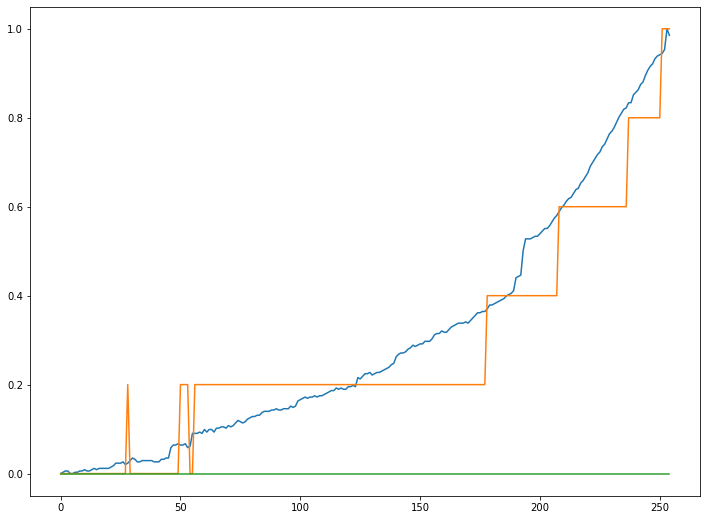

In [4]:
X_test = Train_dataset[num:250, 0:features_num]
Y_test = Train_dataset[num:250, 0:features_num]
r_x_test = Test_dataset[:,0:features_num]
r_y_test = Test_dataset[:,0:features_num]
plt.figure(figsize=(12, 9))
plt.plot(Train_dataset)

In [5]:
def make_dataset(data, label, window_size=10):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data[i:i+window_size]))
        label_list.append(np.array(label[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [6]:
train_feature, train_label = make_dataset(X_train, Y_train, 10)

In [7]:
test_feature, test_label = make_dataset(r_x_test, r_y_test, 10)

test_feature.shape, test_label.shape
print(test_feature.shape, test_label.shape)

(248, 10, 3) (248, 3)


In [8]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
print(x_train.shape, x_valid.shape)

(196, 10, 3) (49, 10, 3)


In [9]:
OUT_STEPS = 32
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(64,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=True)
          )
model.add(tf.keras.layers.LSTM(32,
                                activation='relu', 
                               return_sequences=False))
model.add(tf.keras.layers.Dense(OUT_STEPS*features_num,))
                      #    kernel_initializer=tf.initializers.zeros))
model.add(tf.keras.layers.Reshape([OUT_STEPS, features_num]))

In [10]:
model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(lr=0.001),
                metrics=[tf.metrics.MeanAbsoluteError()])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500, mode='min')
filename = os.path.join('models/', 'tmp_checkpointcell7_GRU_onefeature_copy7.h5')
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [11]:
history = model.fit(x_train, y_train,
                                    epochs=3000,
                                    batch_size=1,
                                    validation_data=(x_valid, y_valid),
                                    callbacks=[early_stop, checkpoint])

Epoch 1/3000
196/196 [==============================] - 5s 15ms/step - loss: 0.0469 - mean_absolute_error: 0.1226 - val_loss: 0.0038 - val_mean_absolute_error: 0.0434

Epoch 00001: val_loss improved from inf to 0.00382, saving model to models\tmp_checkpointcell7_GRU_onefeature_copy7.h5
Epoch 2/3000
196/196 [==============================] - 1s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0409 - val_loss: 0.0016 - val_mean_absolute_error: 0.0281

Epoch 00002: val_loss improved from 0.00382 to 0.00160, saving model to models\tmp_checkpointcell7_GRU_onefeature_copy7.h5
Epoch 3/3000
196/196 [==============================] - 1s 4ms/step - loss: 0.0013 - mean_absolute_error: 0.0260 - val_loss: 0.0014 - val_mean_absolute_error: 0.0257

Epoch 00003: val_loss improved from 0.00160 to 0.00144, saving model to models\tmp_checkpointcell7_GRU_onefeature_copy7.h5
Epoch 4/3000
196/196 [==============================] - 1s 4ms/step - loss: 0.0015 - mean_absolute_error: 0.0261 - val_loss: 0.0045 -

196/196 [==============================] - 1s 5ms/step - loss: 6.7265e-04 - mean_absolute_error: 0.0140 - val_loss: 0.0016 - val_mean_absolute_error: 0.0244

Epoch 00033: val_loss did not improve from 0.00065
Epoch 34/3000
196/196 [==============================] - 1s 4ms/step - loss: 8.9451e-04 - mean_absolute_error: 0.0170 - val_loss: 7.1751e-04 - val_mean_absolute_error: 0.0131

Epoch 00034: val_loss did not improve from 0.00065
Epoch 35/3000
196/196 [==============================] - 1s 4ms/step - loss: 7.7801e-04 - mean_absolute_error: 0.0153 - val_loss: 8.9513e-04 - val_mean_absolute_error: 0.0167

Epoch 00035: val_loss did not improve from 0.00065
Epoch 36/3000
196/196 [==============================] - 1s 4ms/step - loss: 7.6283e-04 - mean_absolute_error: 0.0157 - val_loss: 5.9677e-04 - val_mean_absolute_error: 0.0120

Epoch 00036: val_loss improved from 0.00065 to 0.00060, saving model to models\tmp_checkpointcell7_GRU_onefeature_copy7.h5
Epoch 37/3000
196/196 [===============

196/196 [==============================] - 1s 4ms/step - loss: 4.6847e-04 - mean_absolute_error: 0.0117 - val_loss: 8.2121e-04 - val_mean_absolute_error: 0.0168

Epoch 00068: val_loss did not improve from 0.00053
Epoch 69/3000
196/196 [==============================] - 1s 4ms/step - loss: 4.7422e-04 - mean_absolute_error: 0.0111 - val_loss: 5.7159e-04 - val_mean_absolute_error: 0.0099

Epoch 00069: val_loss did not improve from 0.00053
Epoch 70/3000
196/196 [==============================] - 1s 3ms/step - loss: 7.8426e-04 - mean_absolute_error: 0.0131 - val_loss: 5.3176e-04 - val_mean_absolute_error: 0.0083

Epoch 00070: val_loss did not improve from 0.00053
Epoch 71/3000
196/196 [==============================] - 1s 4ms/step - loss: 4.4922e-04 - mean_absolute_error: 0.0103 - val_loss: 0.0015 - val_mean_absolute_error: 0.0240

Epoch 00071: val_loss did not improve from 0.00053
Epoch 72/3000
196/196 [==============================] - 1s 4ms/step - loss: 8.6951e-04 - mean_absolute_error:

196/196 [==============================] - 1s 4ms/step - loss: 3.5885e-04 - mean_absolute_error: 0.0091 - val_loss: 5.5115e-04 - val_mean_absolute_error: 0.0099

Epoch 00103: val_loss did not improve from 0.00050
Epoch 104/3000
196/196 [==============================] - 1s 4ms/step - loss: 8.1984e-04 - mean_absolute_error: 0.0129 - val_loss: 6.6086e-04 - val_mean_absolute_error: 0.0118

Epoch 00104: val_loss did not improve from 0.00050
Epoch 105/3000
196/196 [==============================] - 1s 4ms/step - loss: 4.9878e-04 - mean_absolute_error: 0.0103 - val_loss: 5.4675e-04 - val_mean_absolute_error: 0.0084

Epoch 00105: val_loss did not improve from 0.00050
Epoch 106/3000
196/196 [==============================] - 1s 4ms/step - loss: 4.1099e-04 - mean_absolute_error: 0.0089 - val_loss: 5.5300e-04 - val_mean_absolute_error: 0.0091

Epoch 00106: val_loss did not improve from 0.00050
Epoch 107/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.7961e-04 - mean_absolut

196/196 [==============================] - 1s 4ms/step - loss: 2.1163e-04 - mean_absolute_error: 0.0065 - val_loss: 5.4634e-04 - val_mean_absolute_error: 0.0095

Epoch 00138: val_loss did not improve from 0.00047
Epoch 139/3000
196/196 [==============================] - 1s 4ms/step - loss: 5.0949e-04 - mean_absolute_error: 0.0098 - val_loss: 5.4106e-04 - val_mean_absolute_error: 0.0067

Epoch 00139: val_loss did not improve from 0.00047
Epoch 140/3000
196/196 [==============================] - 1s 4ms/step - loss: 7.0793e-04 - mean_absolute_error: 0.0122 - val_loss: 5.6391e-04 - val_mean_absolute_error: 0.0080

Epoch 00140: val_loss did not improve from 0.00047
Epoch 141/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.6792e-04 - mean_absolute_error: 0.0076 - val_loss: 6.4145e-04 - val_mean_absolute_error: 0.0106

Epoch 00141: val_loss did not improve from 0.00047
Epoch 142/3000
196/196 [==============================] - ETA: 0s - loss: 4.3257e-04 - mean_absolute_er


Epoch 00173: val_loss did not improve from 0.00047
Epoch 174/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.2663e-04 - mean_absolute_error: 0.0087 - val_loss: 5.0189e-04 - val_mean_absolute_error: 0.0077

Epoch 00174: val_loss did not improve from 0.00047
Epoch 175/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.2377e-04 - mean_absolute_error: 0.0062 - val_loss: 6.6247e-04 - val_mean_absolute_error: 0.0103

Epoch 00175: val_loss did not improve from 0.00047
Epoch 176/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.9140e-04 - mean_absolute_error: 0.0070 - val_loss: 5.6340e-04 - val_mean_absolute_error: 0.0073

Epoch 00176: val_loss did not improve from 0.00047
Epoch 177/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.9623e-04 - mean_absolute_error: 0.0069 - val_loss: 5.7085e-04 - val_mean_absolute_error: 0.0112

Epoch 00177: val_loss did not improve from 0.00047
Epoch 178/3000
196/196 [============


Epoch 00209: val_loss did not improve from 0.00047
Epoch 210/3000
196/196 [==============================] - 1s 4ms/step - loss: 1.8972e-04 - mean_absolute_error: 0.0063 - val_loss: 6.0198e-04 - val_mean_absolute_error: 0.0089

Epoch 00210: val_loss did not improve from 0.00047
Epoch 211/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.4970e-04 - mean_absolute_error: 0.0085 - val_loss: 0.0011 - val_mean_absolute_error: 0.0134

Epoch 00211: val_loss did not improve from 0.00047
Epoch 212/3000
196/196 [==============================] - 1s 4ms/step - loss: 5.2447e-04 - mean_absolute_error: 0.0084 - val_loss: 5.1282e-04 - val_mean_absolute_error: 0.0088

Epoch 00212: val_loss did not improve from 0.00047
Epoch 213/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.3979e-04 - mean_absolute_error: 0.0065 - val_loss: 6.4129e-04 - val_mean_absolute_error: 0.0097

Epoch 00213: val_loss did not improve from 0.00047
Epoch 214/3000
196/196 [================


Epoch 00245: val_loss did not improve from 0.00047
Epoch 246/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.3772e-04 - mean_absolute_error: 0.0079 - val_loss: 5.8780e-04 - val_mean_absolute_error: 0.0069

Epoch 00246: val_loss did not improve from 0.00047
Epoch 247/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.9105e-04 - mean_absolute_error: 0.0065 - val_loss: 5.6950e-04 - val_mean_absolute_error: 0.0071

Epoch 00247: val_loss did not improve from 0.00047
Epoch 248/3000
196/196 [==============================] - 1s 4ms/step - loss: 5.1183e-04 - mean_absolute_error: 0.0077 - val_loss: 6.0478e-04 - val_mean_absolute_error: 0.0089

Epoch 00248: val_loss did not improve from 0.00047
Epoch 249/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.0334e-04 - mean_absolute_error: 0.0062 - val_loss: 6.1599e-04 - val_mean_absolute_error: 0.0076

Epoch 00249: val_loss did not improve from 0.00047
Epoch 250/3000
196/196 [============


Epoch 00281: val_loss did not improve from 0.00047
Epoch 282/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.2463e-04 - mean_absolute_error: 0.0059 - val_loss: 0.0012 - val_mean_absolute_error: 0.0174

Epoch 00282: val_loss did not improve from 0.00047
Epoch 283/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.2221e-04 - mean_absolute_error: 0.0075 - val_loss: 6.6274e-04 - val_mean_absolute_error: 0.0085

Epoch 00283: val_loss did not improve from 0.00047
Epoch 284/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.8469e-04 - mean_absolute_error: 0.0081 - val_loss: 6.0957e-04 - val_mean_absolute_error: 0.0072

Epoch 00284: val_loss did not improve from 0.00047
Epoch 285/3000
196/196 [==============================] - 1s 4ms/step - loss: 1.9185e-04 - mean_absolute_error: 0.0054 - val_loss: 6.2011e-04 - val_mean_absolute_error: 0.0081

Epoch 00285: val_loss did not improve from 0.00047
Epoch 286/3000
196/196 [================


Epoch 00317: val_loss did not improve from 0.00047
Epoch 318/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.2290e-04 - mean_absolute_error: 0.0066 - val_loss: 6.6008e-04 - val_mean_absolute_error: 0.0114

Epoch 00318: val_loss did not improve from 0.00047
Epoch 319/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.1295e-04 - mean_absolute_error: 0.0061 - val_loss: 6.2877e-04 - val_mean_absolute_error: 0.0086

Epoch 00319: val_loss did not improve from 0.00047
Epoch 320/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.4061e-04 - mean_absolute_error: 0.0064 - val_loss: 5.8521e-04 - val_mean_absolute_error: 0.0072

Epoch 00320: val_loss did not improve from 0.00047
Epoch 321/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.9408e-04 - mean_absolute_error: 0.0063 - val_loss: 6.0373e-04 - val_mean_absolute_error: 0.0079

Epoch 00321: val_loss did not improve from 0.00047
Epoch 322/3000
196/196 [============


Epoch 00353: val_loss did not improve from 0.00047
Epoch 354/3000
196/196 [==============================] - 1s 5ms/step - loss: 5.0330e-04 - mean_absolute_error: 0.0089 - val_loss: 5.9287e-04 - val_mean_absolute_error: 0.0063

Epoch 00354: val_loss did not improve from 0.00047
Epoch 355/3000
196/196 [==============================] - 1s 4ms/step - loss: 1.7259e-04 - mean_absolute_error: 0.0043 - val_loss: 6.6904e-04 - val_mean_absolute_error: 0.0097

Epoch 00355: val_loss did not improve from 0.00047
Epoch 356/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.3942e-04 - mean_absolute_error: 0.0068 - val_loss: 6.1989e-04 - val_mean_absolute_error: 0.0092

Epoch 00356: val_loss did not improve from 0.00047
Epoch 357/3000
196/196 [==============================] - 1s 4ms/step - loss: 4.9993e-04 - mean_absolute_error: 0.0095 - val_loss: 6.1284e-04 - val_mean_absolute_error: 0.0073

Epoch 00357: val_loss did not improve from 0.00047
Epoch 358/3000
196/196 [============


Epoch 00389: val_loss did not improve from 0.00047
Epoch 390/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.0943e-04 - mean_absolute_error: 0.0071 - val_loss: 6.0571e-04 - val_mean_absolute_error: 0.0089

Epoch 00390: val_loss did not improve from 0.00047
Epoch 391/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.5205e-04 - mean_absolute_error: 0.0065 - val_loss: 5.9722e-04 - val_mean_absolute_error: 0.0082

Epoch 00391: val_loss did not improve from 0.00047
Epoch 392/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.9722e-04 - mean_absolute_error: 0.0064 - val_loss: 6.0838e-04 - val_mean_absolute_error: 0.0076

Epoch 00392: val_loss did not improve from 0.00047
Epoch 393/3000
196/196 [==============================] - 1s 4ms/step - loss: 8.5307e-05 - mean_absolute_error: 0.0040 - val_loss: 5.8633e-04 - val_mean_absolute_error: 0.0093

Epoch 00393: val_loss did not improve from 0.00047
Epoch 394/3000
196/196 [============


Epoch 00425: val_loss did not improve from 0.00047
Epoch 426/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.8691e-04 - mean_absolute_error: 0.0070 - val_loss: 6.1822e-04 - val_mean_absolute_error: 0.0075

Epoch 00426: val_loss did not improve from 0.00047
Epoch 427/3000
196/196 [==============================] - 1s 4ms/step - loss: 1.3921e-04 - mean_absolute_error: 0.0047 - val_loss: 6.8479e-04 - val_mean_absolute_error: 0.0081

Epoch 00427: val_loss did not improve from 0.00047
Epoch 428/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.6495e-04 - mean_absolute_error: 0.0061 - val_loss: 5.8987e-04 - val_mean_absolute_error: 0.0070

Epoch 00428: val_loss did not improve from 0.00047
Epoch 429/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.1134e-04 - mean_absolute_error: 0.0050 - val_loss: 5.8978e-04 - val_mean_absolute_error: 0.0070

Epoch 00429: val_loss did not improve from 0.00047
Epoch 430/3000
196/196 [============

196/196 [==============================] - 1s 4ms/step - loss: 3.8222e-04 - mean_absolute_error: 0.0084 - val_loss: 5.7126e-04 - val_mean_absolute_error: 0.0071

Epoch 00461: val_loss did not improve from 0.00047
Epoch 462/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.6126e-04 - mean_absolute_error: 0.0064 - val_loss: 6.5505e-04 - val_mean_absolute_error: 0.0085

Epoch 00462: val_loss did not improve from 0.00047
Epoch 463/3000
196/196 [==============================] - 1s 4ms/step - loss: 1.7361e-04 - mean_absolute_error: 0.0050 - val_loss: 6.7534e-04 - val_mean_absolute_error: 0.0095

Epoch 00463: val_loss did not improve from 0.00047
Epoch 464/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.8742e-04 - mean_absolute_error: 0.0071 - val_loss: 5.9813e-04 - val_mean_absolute_error: 0.0080

Epoch 00464: val_loss did not improve from 0.00047
Epoch 465/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.2666e-04 - mean_absolut

196/196 [==============================] - 1s 5ms/step - loss: 3.1977e-04 - mean_absolute_error: 0.0081 - val_loss: 6.1192e-04 - val_mean_absolute_error: 0.0076

Epoch 00497: val_loss did not improve from 0.00047
Epoch 498/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.0687e-04 - mean_absolute_error: 0.0067 - val_loss: 5.9136e-04 - val_mean_absolute_error: 0.0069

Epoch 00498: val_loss did not improve from 0.00047
Epoch 499/3000
196/196 [==============================] - 1s 4ms/step - loss: 1.5434e-04 - mean_absolute_error: 0.0044 - val_loss: 6.8421e-04 - val_mean_absolute_error: 0.0095

Epoch 00499: val_loss did not improve from 0.00047
Epoch 500/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.3340e-04 - mean_absolute_error: 0.0062 - val_loss: 7.0062e-04 - val_mean_absolute_error: 0.0114

Epoch 00500: val_loss did not improve from 0.00047
Epoch 501/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.2086e-04 - mean_absolut

196/196 [==============================] - 1s 4ms/step - loss: 2.4887e-04 - mean_absolute_error: 0.0067 - val_loss: 6.2160e-04 - val_mean_absolute_error: 0.0077

Epoch 00532: val_loss did not improve from 0.00047
Epoch 533/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.3042e-04 - mean_absolute_error: 0.0063 - val_loss: 6.9915e-04 - val_mean_absolute_error: 0.0088

Epoch 00533: val_loss did not improve from 0.00047
Epoch 534/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.2069e-04 - mean_absolute_error: 0.0061 - val_loss: 8.0318e-04 - val_mean_absolute_error: 0.0123

Epoch 00534: val_loss did not improve from 0.00047
Epoch 535/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.7979e-04 - mean_absolute_error: 0.0071 - val_loss: 6.2726e-04 - val_mean_absolute_error: 0.0092

Epoch 00535: val_loss did not improve from 0.00047
Epoch 536/3000
196/196 [==============================] - 1s 5ms/step - loss: 2.3737e-04 - mean_absolut

196/196 [==============================] - 1s 4ms/step - loss: 2.1113e-04 - mean_absolute_error: 0.0057 - val_loss: 7.9800e-04 - val_mean_absolute_error: 0.0101

Epoch 00568: val_loss did not improve from 0.00047
Epoch 569/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.5433e-04 - mean_absolute_error: 0.0068 - val_loss: 6.6829e-04 - val_mean_absolute_error: 0.0100

Epoch 00569: val_loss did not improve from 0.00047
Epoch 570/3000
196/196 [==============================] - 1s 4ms/step - loss: 1.9820e-04 - mean_absolute_error: 0.0056 - val_loss: 6.2846e-04 - val_mean_absolute_error: 0.0076

Epoch 00570: val_loss did not improve from 0.00047
Epoch 571/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.4158e-04 - mean_absolute_error: 0.0067 - val_loss: 6.3769e-04 - val_mean_absolute_error: 0.0085

Epoch 00571: val_loss did not improve from 0.00047
Epoch 572/3000
196/196 [==============================] - 1s 4ms/step - loss: 1.2029e-04 - mean_absolut

196/196 [==============================] - 1s 4ms/step - loss: 1.8578e-04 - mean_absolute_error: 0.0061 - val_loss: 6.0678e-04 - val_mean_absolute_error: 0.0101

Epoch 00604: val_loss did not improve from 0.00047
Epoch 605/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.4477e-04 - mean_absolute_error: 0.0063 - val_loss: 5.7235e-04 - val_mean_absolute_error: 0.0083

Epoch 00605: val_loss did not improve from 0.00047
Epoch 606/3000
196/196 [==============================] - 1s 4ms/step - loss: 5.2427e-04 - mean_absolute_error: 0.0091 - val_loss: 5.9176e-04 - val_mean_absolute_error: 0.0082

Epoch 00606: val_loss did not improve from 0.00047
Epoch 607/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.1635e-04 - mean_absolute_error: 0.0058 - val_loss: 6.6258e-04 - val_mean_absolute_error: 0.0089

Epoch 00607: val_loss did not improve from 0.00047
Epoch 608/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.0221e-04 - mean_absolut

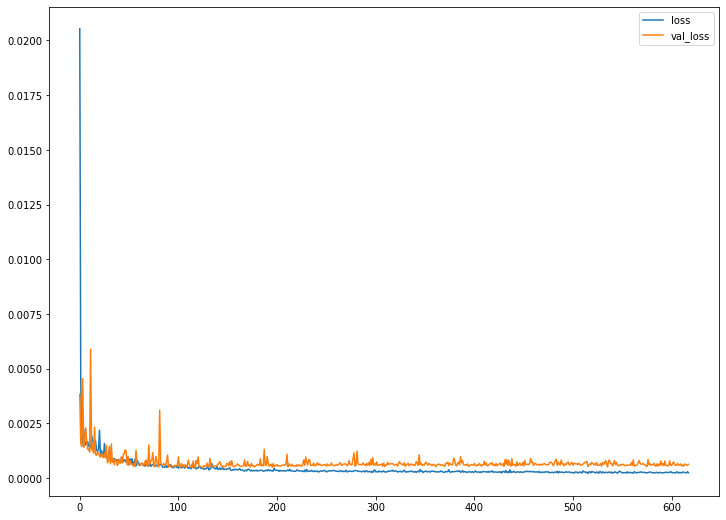

In [12]:
plt.figure(figsize=(12, 9))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [13]:
model.load_weights(filename)
pred = model.predict(test_feature)
print(pred)

[[[ 1.7662236e-01  2.8084451e-01  2.1051634e-03]
  [ 1.6130130e-01  2.8161842e-01 -2.0740298e-03]
  [ 1.6257060e-01  2.8400838e-01  2.4852054e-03]
  ...
  [ 1.5946311e-01  2.8862572e-01  8.0506777e-04]
  [ 1.6642967e-01  2.8616315e-01  5.2406988e-03]
  [ 1.7258406e-01  2.6959383e-01  5.5425214e-03]]

 [[ 1.8799198e-01  2.7889234e-01  1.6307640e-03]
  [ 1.7580628e-01  2.7954629e-01 -1.7875386e-03]
  [ 1.7727032e-01  2.8151155e-01  3.6364230e-03]
  ...
  [ 1.7623308e-01  2.8674346e-01  3.6850569e-04]
  [ 1.8001036e-01  2.8219765e-01  4.3227635e-03]
  [ 1.8593520e-01  2.7114731e-01  4.5026890e-03]]

 [[ 1.9015428e-01  2.8880692e-01  1.1030524e-03]
  [ 1.8020025e-01  2.9047778e-01 -1.1759400e-03]
  [ 1.8144886e-01  2.9265976e-01  3.6745351e-03]
  ...
  [ 1.8297519e-01  2.9746187e-01  4.2216544e-04]
  [ 1.8516055e-01  2.9194084e-01  4.0809521e-03]
  [ 1.8852505e-01  2.8594738e-01  2.9669823e-03]]

 ...

 [[ 9.5726305e-01  9.5115292e-01 -7.4511068e-04]
  [ 9.4860584e-01  9.3766671e-01 -2.786

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10, 64)            13248     
_________________________________________________________________
lstm (LSTM)                  (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 96)                3168      
_________________________________________________________________
reshape (Reshape)            (None, 32, 3)             0         
Total params: 28,832
Trainable params: 28,832
Non-trainable params: 0
_________________________________________________________________


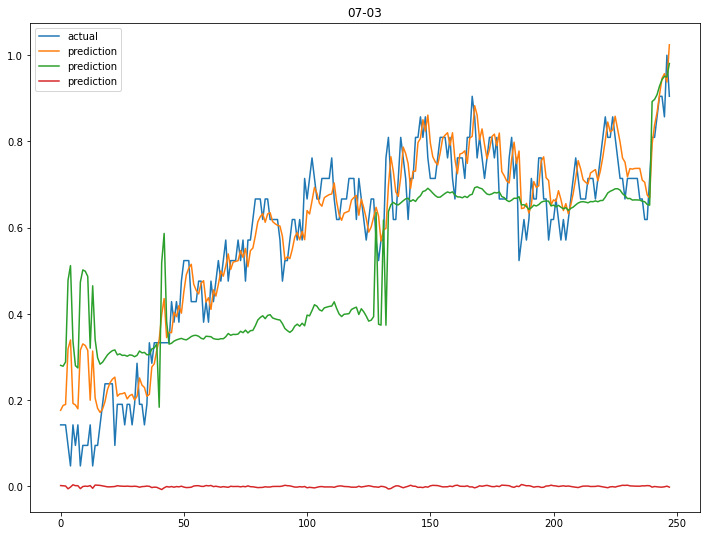

In [14]:
model.summary()

plt.figure(figsize=(12, 9))
plt.plot(test_label[:,0], label='actual')
plt.plot(pred[:,0], label='prediction')
plt.title('07-03')
plt.savefig('savefig/cell7/07-03.png')
plt.legend()
plt.show()

In [15]:
'''
loop = len(test_label)
error_avg = 0
for i in range(loop):
    error = abs((test_label[i] - pred[i])/test_label[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)
'''

'\nloop = len(test_label)\nerror_avg = 0\nfor i in range(loop):\n    error = abs((test_label[i] - pred[i])/test_label[i] * 100)\n    error_avg = error_avg + error\n\nerror_avg = error_avg / loop\nprint(error_avg)\n'

In [16]:
test_ds2 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_23.csv',delimiter=",", skiprows=1)

test_ds2 = scaler.fit_transform(test_ds2)
x_test2 = test_ds2[:, 1:4]
y_test2 = test_ds2[:, 1:4]

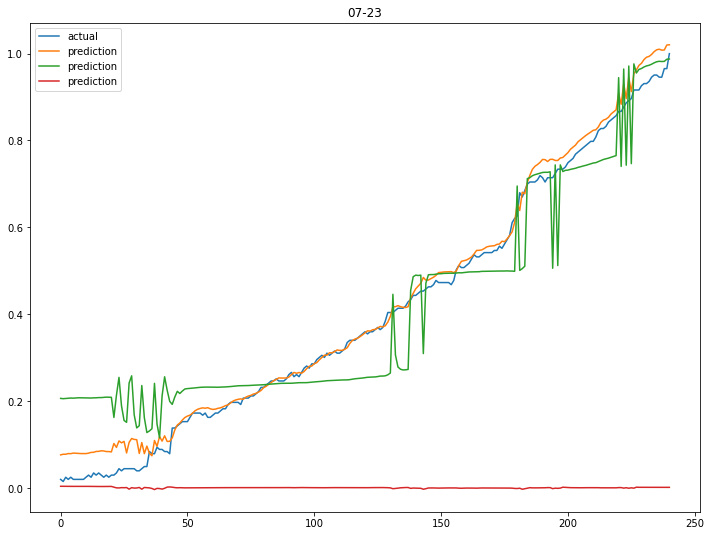

In [17]:
test_feature2, test_label2 = make_dataset(x_test2, y_test2, 10)

pred2 = model.predict(test_feature2)

plt.figure(figsize=(12, 9))
plt.plot(test_label2[:,0], label='actual')
plt.plot(pred2[:, 0], label='prediction')
plt.title('07-23')
plt.savefig('savefig/cell7/07-23.png')
plt.legend()
plt.show()

241


"\npred2 = model.predict(test_feature2)\n\nplt.figure(figsize=(12, 9))\nplt.plot(test_label2[:,0], label='actual')\nplt.plot(pred2[:, 0], label='prediction')\nplt.title('07-23')\nplt.savefig('savefig/cell7/07-23.png')\nplt.legend()\nplt.show()\nloop = len(test_label2)\nerror_avg = 0\nfor i in range(loop):\n    error = abs((test_label2[i] - pred2[i])/test_label2[i] * 100)\n    error_avg = error_avg + error\n\nerror_avg = error_avg / loop\nprint(error_avg)\n"

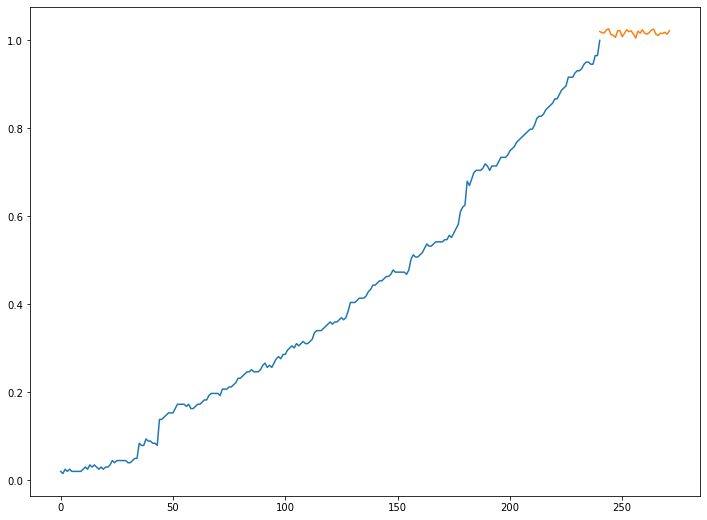

In [22]:
print(len(test_label2))
x_data = range(272)
plt.figure(figsize=(12, 9))
plt.plot(test_label2[:, 0], label ='actual')

predictions = model(test_feature2)
plt.plot(x_data[240:], predictions[240,:,0], label='predictions')


'''
pred2 = model.predict(test_feature2)

plt.figure(figsize=(12, 9))
plt.plot(test_label2[:,0], label='actual')
plt.plot(pred2[:, 0], label='prediction')
plt.title('07-23')
plt.savefig('savefig/cell7/07-23.png')
plt.legend()
plt.show()
loop = len(test_label2)
error_avg = 0
for i in range(loop):
    error = abs((test_label2[i] - pred2[i])/test_label2[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)
'''

<ipython-input-59-bf321a546b94>:13: RuntimeWarning: divide by zero encountered in true_divide
  error = abs((test_label3[i] - pred3[i])/test_label3[i] * 100)


[[2.58299332e-03 8.61003561e-03            inf]
 [2.20768660e-03 6.11176190e-03            inf]
 [6.68960868e-05 1.00624214e-02            inf]
 [1.72014375e-03 9.27737616e-03            inf]
 [2.12551321e-03 1.27007660e-02            inf]
 [5.31696579e-04 1.18440795e-02            inf]
 [3.58547979e-03 1.07097973e-02            inf]
 [1.22739273e-03 1.24086454e-02            inf]
 [3.94443864e-03 7.86642426e-03            inf]
 [3.53096758e-03 1.14492132e-02            inf]
 [7.28970592e-04 1.17939074e-02            inf]
 [6.20953088e-03 1.14225357e-02            inf]
 [8.72716163e-04 8.37436579e-03            inf]
 [4.01202915e-04 1.42780322e-02            inf]
 [2.03356002e-03 8.01222417e-03            inf]
 [5.42963593e-03 1.09074475e-02            inf]
 [1.32982013e-04 7.41539650e-03            inf]
 [1.39717917e-03 3.95925300e-03            inf]
 [1.27021549e-03 9.77423585e-03            inf]
 [1.00089508e-03 7.21985854e-03            inf]
 [7.64675511e-04 1.26623124e-02         

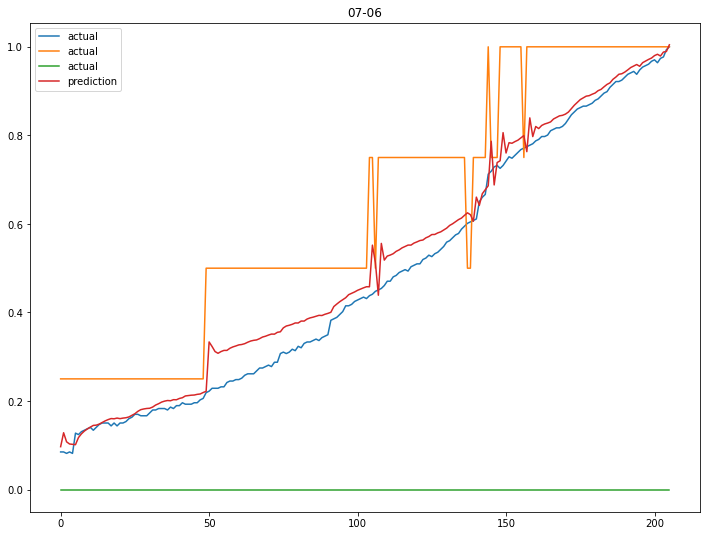

In [59]:
test_ds3 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_06.csv',delimiter=",", skiprows=1)

test_ds3 = scaler.fit_transform(test_ds3)
x_test3 = test_ds3[:, 1:4]
y_test3 = test_ds3[:, 1:4]
test_feature3, test_label3 = make_dataset(x_test3, y_test3, 50)

pred3 = model.predict(test_feature3)

loop = len(test_label3)
for i in range(loop):
    error_avg = 0
    error = abs((test_label3[i] - pred3[i])/test_label3[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label3, label='actual')
plt.plot(pred3[:,1,0], label='prediction')
plt.title('07-06')
plt.savefig('savefig/cell7/07-06.png')
plt.legend()
plt.show()


In [60]:
test_ds4 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_7.csv',delimiter=",", skiprows=1)
test_ds4 = scaler.fit_transform(test_ds4)
x_test4 = test_ds4[:, 1:2]
y_test4 = test_ds4[:, 1]
test_feature4, test_label4 = make_dataset(x_test4, y_test4, 10)

pred4 = model.predict(test_feature4)
loop = len(test_label4)
for i in range(loop):
    error_avg = 0
    error = abs((test_label4[i] - pred4[i])/test_label4[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label4, label='actual')
plt.plot(pred4, label='prediction')
plt.title('07-07')
plt.savefig('savefig/cell7/07-07.png')
plt.legend()
plt.show()

InvalidArgumentError:  Specified a list with shape [?,3] from a tensor with shape [32,1]
	 [[node sequential_3/gru_3/TensorArrayUnstack/TensorListFromTensor (defined at <ipython-input-50-6b122fb95410>:7) ]] [Op:__inference_predict_function_545657]

Function call stack:
predict_function


In [ ]:
test_ds5 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_9.csv',delimiter=",", skiprows=1)
test_ds5 = scaler.fit_transform(test_ds5)
x_test5 = test_ds5[:, 1:2]
y_test5 = test_ds5[:, 1]
test_feature5, test_label5 = make_dataset(x_test5, y_test5, 10)

pred5 = model.predict(test_feature5)

loop = len(test_label5)
for i in range(loop):
    error_avg = 0
    if test_label5[i]!=0:
        error = abs((test_label5[i] - pred5[i])/test_label5[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label5, label='actual')
plt.plot(pred5, label='prediction')
plt.title('07-09')
plt.savefig('savefig/cell7/07-09.png')
plt.legend()
plt.show()

In [ ]:
test_ds6 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_18.csv',delimiter=",", skiprows=1)
test_ds6 = scaler.fit_transform(test_ds6)
x_test6 = test_ds6[:, 1:2]
y_test6 = test_ds6[:, 1]
test_feature6, test_label6 = make_dataset(x_test6, y_test6, 10)

pred6 = model.predict(test_feature6)

loop = len(test_label6)
for i in range(loop):
    error_avg = 0
    error = abs((test_label6[i] - pred6[i])/test_label6[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label6, label='actual')
plt.plot(pred6, label='prediction')
plt.title('07-18')
plt.savefig('savefig/cell7/07-18.png')
plt.legend()
plt.show()

In [ ]:
test_ds7 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_19.csv',delimiter=",", skiprows=1)
test_ds7 = scaler.fit_transform(test_ds7)
x_test7 = test_ds7[:, 1:2]
y_test7 = test_ds7[:, 1]
test_feature7, test_label7 = make_dataset(x_test7, y_test7, 10)

pred7 = model.predict(test_feature7)

loop = len(test_label7)
for i in range(loop):
    error_avg = 0
    if test_label7[i]!=0:
        error = abs((test_label7[i] - pred7[i])/test_label7[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label7, label='actual')
plt.plot(pred7, label='prediction')
plt.title('07-19')
plt.savefig('savefig/cell7/07-19.png')
plt.legend()
plt.show()

In [ ]:
test_ds7 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_20.csv',delimiter=",", skiprows=1)
test_ds7 = scaler.fit_transform(test_ds7)
x_test7 = test_ds7[:, 1:2]
y_test7 = test_ds7[:, 1]
test_feature7, test_label7 = make_dataset(x_test7, y_test7, 10)

pred7 = model.predict(test_feature7)

loop = len(test_label7)
for i in range(loop):
    error_avg = 0
    if test_label7[i]!=0:
        error = abs((test_label7[i] - pred7[i])/test_label7[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label7, label='actual')
plt.plot(pred7, label='prediction')
plt.title('07-20')
plt.savefig('savefig/cell7/07-20.png')
plt.legend()
plt.show()

In [ ]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)

pred8 = model.predict(test_feature8)

loop = len(test_label8)
for i in range(loop):
    error_avg = 0
    if test_label8[i]!=0:
        error = abs((test_label8[i] - pred8[i])/test_label8[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label8, label='actual')
plt.plot(pred8, label='prediction')
plt.title('07-22')
plt.savefig('savefig/cell7/07-22.png')
plt.legend()
plt.show()

In [25]:
print(pred8.shape)
print(test_feature8.shape)

(241, 1)
(241, 10, 1)


In [26]:
def predict_next_timestamp(model, history):
    """Predict the next time stamp given a sequence of history data"""

    prediction = model.predict(history)
    prediction = np.reshape(prediction, (prediction.size,))
    return prediction

In [27]:
xhat = test_feature8[0]
xxhat = np.array([xhat])
print(xxhat.shape)
tttest=model.predict(xxhat)

(1, 10, 1)


In [28]:
testpred = np.zeros((300,1))
testpred.shape


(300, 1)

In [29]:

for i in range(300):
    expred = model.predict(np.array([xhat]))
    testpred[i] = expred
    xhat = np.vstack([xhat[1:],expred])

print(testpred.shape)
'''
i=0
expred = model.predict(np.array([xhat]))
testpred[i] = expred
xhat = np.vstack([xhat[1:],expred])

testpred.shape'''
'''
xhat = test_feature8
test1 = np.zeros((20,10,1))
print(test1.shape, xhat.shape)
testfe = np.concatenate((xhat,test1), axis=0)
testfe.shape'''

(300, 1)


'\nxhat = test_feature8\ntest1 = np.zeros((20,10,1))\nprint(test1.shape, xhat.shape)\ntestfe = np.concatenate((xhat,test1), axis=0)\ntestfe.shape'

In [133]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:4]
y_test8 = test_ds8[:, 1:4]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 50)
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 50)

for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[200,1,1]
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    x_test8 = x_test8[1:]
    y_test8 = y_test8[1:]
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,50,1))
    y_test8 = y_test8.reshape((test_len,50,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 50)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(251, 4)
[0.20065019]
()


ValueError: cannot reshape array of size 753 into shape (753,50,1)

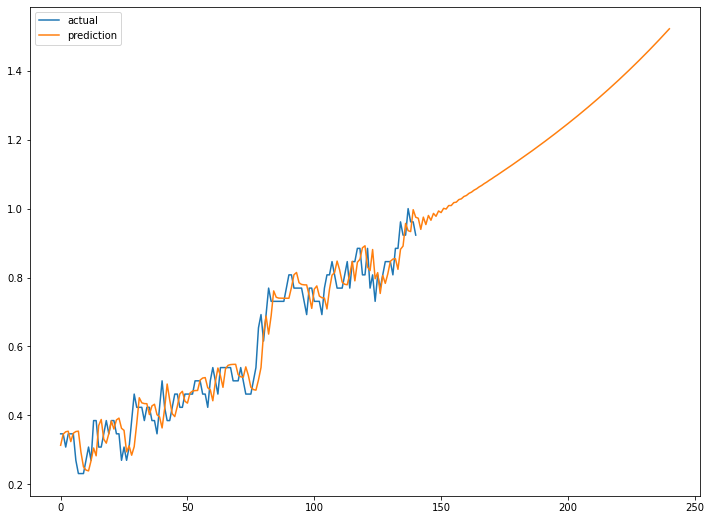

In [32]:
ac_test_label8 = ac_test_label8[100:]

plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.legend()
plt.show()

In [162]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:4]
y_test8 = test_ds8[:, 1:4]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:4]
y_test8 = test_ds8[:200, 1:4]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    print('plz_pred')
    print(plz_pred)
    add_pred = plz_pred[pred_len-1,1,:]
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(251, 4)
plz_pred
[[[ 2.3909692e-01  9.6380782e-01 -9.6276752e-04]
  [ 2.3680788e-01  9.9282503e-01 -1.4331932e-02]
  [ 2.2186959e-01  9.6145439e-01  3.7272509e-02]
  ...
  [ 2.3350134e-01  9.7894752e-01  5.5908761e-03]
  [ 2.2885908e-01  9.6026802e-01  1.9791888e-03]
  [ 2.2713849e-01  9.6059132e-01 -5.9417561e-03]]

 [[ 2.4167712e-01  9.6070707e-01 -1.0747619e-03]
  [ 2.3945968e-01  9.8991847e-01 -1.4215712e-02]
  [ 2.2440669e-01  9.5897186e-01  3.6260646e-02]
  ...
  [ 2.3584631e-01  9.7597718e-01  5.7234275e-03]
  [ 2.3128232e-01  9.5727515e-01  1.8315412e-03]
  [ 2.2968483e-01  9.5780903e-01 -6.1467681e-03]]

 [[ 2.4875285e-01  9.5794159e-01 -1.3589379e-03]
  [ 2.4674404e-01  9.8653865e-01 -1.3495856e-02]
  [ 2.3216212e-01  9.5715559e-01  3.4181826e-02]
  ...
  [ 2.4273711e-01  9.7298163e-01  5.3446633e-03]
  [ 2.3830879e-01  9.5484960e-01  1.6769872e-03]
  [ 2.3720872e-01  9.5581609e-01 -7.3151737e-03]]

 ...

 [[ 7.1981078e-01  9.4920385e-01 -1.6823723e-03]
  [ 7.1853262e-01  9.

InvalidArgumentError:  Specified a list with shape [?,3] from a tensor with shape [32,1]
	 [[node sequential_9/gru_9/TensorArrayUnstack/TensorListFromTensor (defined at <ipython-input-160-1c66caeafe85>:15) ]] [Op:__inference_predict_function_1888180]

Function call stack:
predict_function


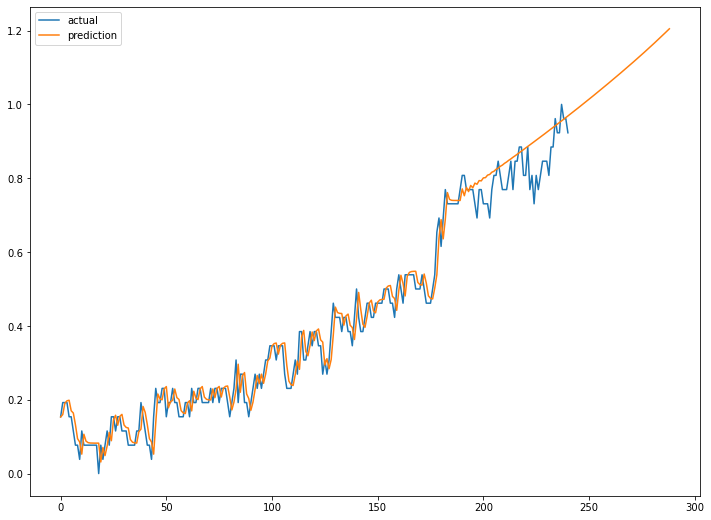

[0.12040385]


In [77]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/22.png')
plt.legend()
plt.show()

loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [78]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_23.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(251, 4)
[array([[0.7173299]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.7260763]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.72613037]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.7333391]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.7346736]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.7408463]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.7430441]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.7485199]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.7513031]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.75631154]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.7594937]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.76418895]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.76764

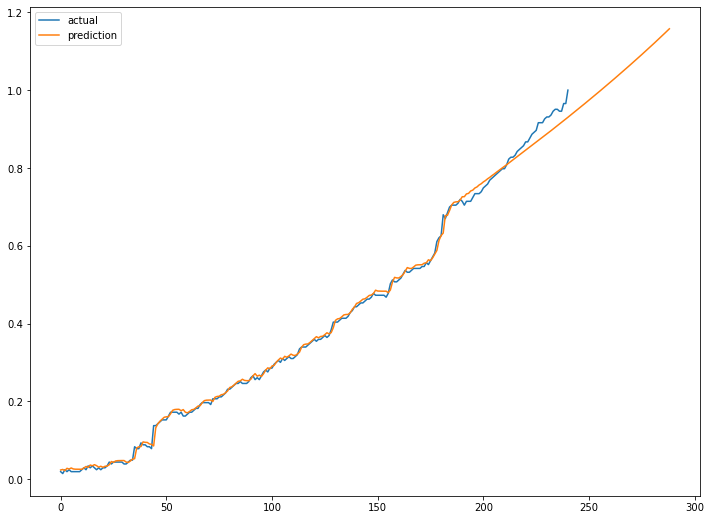

[0.17021793]


In [79]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/23.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [80]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_20.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(252, 4)
[array([[0.80784416]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.82239115]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.81797165]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.82919675]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.82742506]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.83643997]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.8365078]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.8440195]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.8453598]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.8518402]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.8540657]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.8598449]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.86

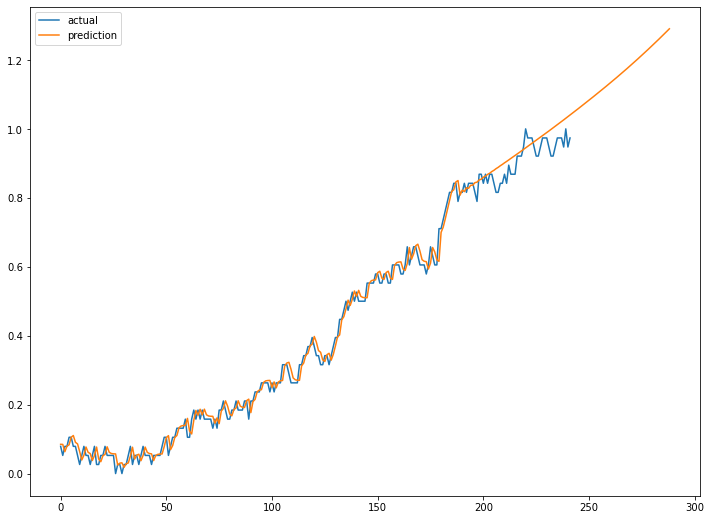

[0.16253729]


In [81]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/20.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [82]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_19.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(252, 4)
[array([[0.6973296]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.7060585]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.7059218]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.71319073]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.7144266]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.72063935]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.72277355]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.72826654]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.7310076]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.7360181]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.73916644]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.74385256]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.74

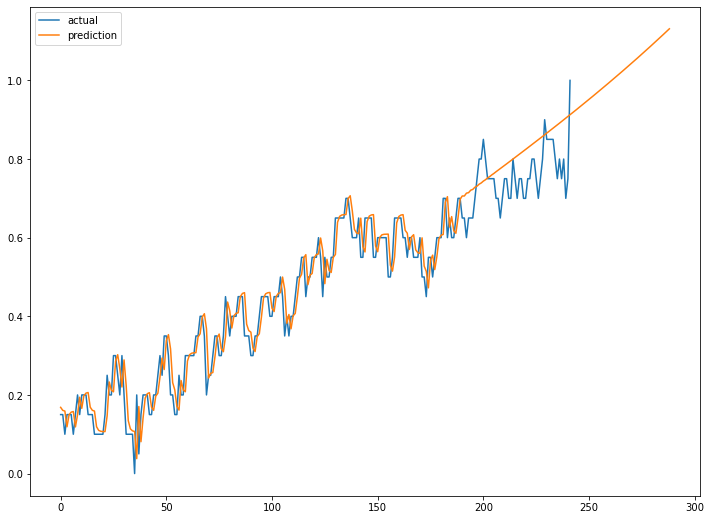

[0.20819776]


In [83]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/19.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [84]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_18.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(252, 4)
[array([[0.83107466]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.8454612]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.84109205]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.8523199]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.8505958]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.85965616]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.85976034]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.86733365]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.8687049]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.8752589]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.8775137]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.8833685]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.886

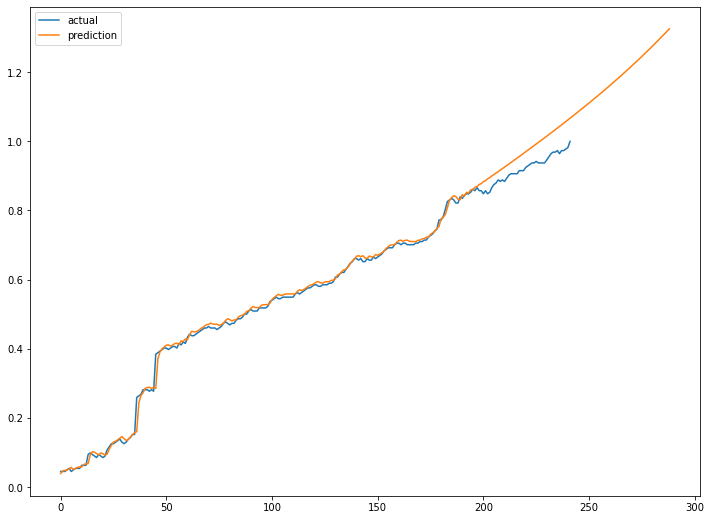

[0.15910324]


In [85]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/18.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [86]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_9.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(254, 4)
[array([[0.876093]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.8480299]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.8790072]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.8608785]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.88367456]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.87239367]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.8895412]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.88300353]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.8962397]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.8929966]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.90352464]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.90257615]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.9112

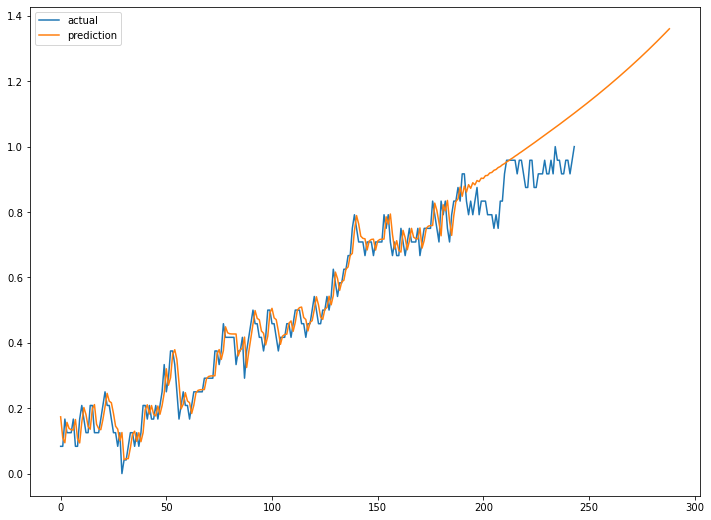

[0.23235136]


In [87]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/09.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [88]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_7.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(255, 4)
[array([[0.6014979]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.603802]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.6091992]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.612066]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.6169772]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.6202192]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.62481105]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.6282994]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.6326801]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.6363298]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.64057034]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.64432573]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.6484729

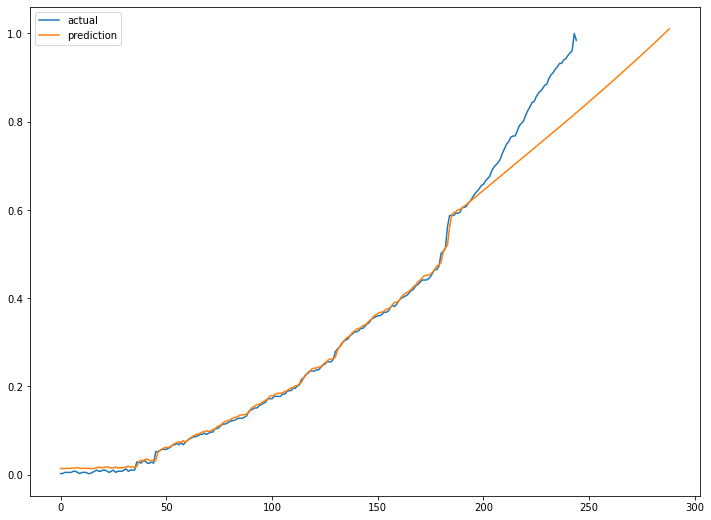

[0.36985365]


In [89]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/07.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [90]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_06.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)


(256, 4)
[array([[0.7352941]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.739949]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.74341595]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.7478531]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.7514937]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.7557977]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.75956094]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.76377743]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.7676279]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.7717883]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.77570194]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.7798285]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.78378

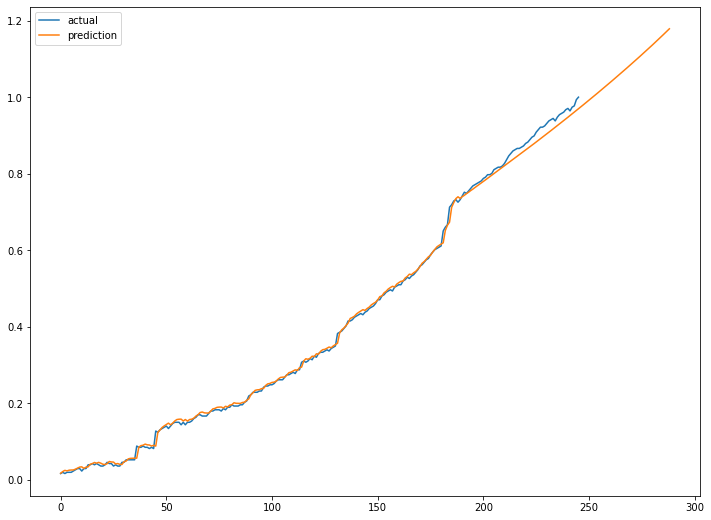

[0.06588814]


In [91]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/06.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [92]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_03.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)


(258, 3)
[array([[0.67562455]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.67562455]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.68286794]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.68416363]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.6903194]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.6924944]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.6979299]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.70069534]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.70565134]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.70881367]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.7134504]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.7168809]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.7

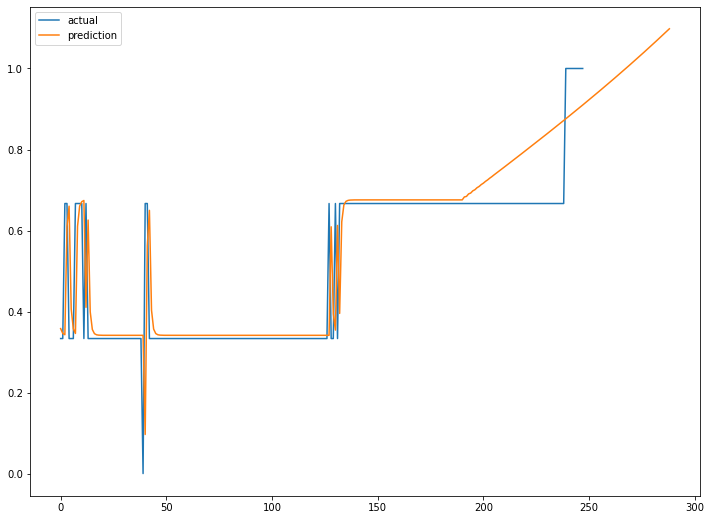

[0.18780108]


In [93]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)